In [1]:
import pandas as pd

df = pd.read_excel('finalDataset0.2.xlsx')
df.head()


,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [3]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()


,teaching,coursecontent,examination,labwork,library_facilities,extracurricular
0,0,0.0,1.0,-1,0.0,1
1,1,-1.0,1.0,1,-1.0,1
2,1,1.0,1.0,1,1.0,1
3,1,-1.0,-1.0,1,0.0,-1
4,1,1.0,1.0,1,1.0,1


In [5]:
numeric_df = numeric_df.dropna()


In [7]:
numeric_df.describe()


,teaching,coursecontent,examination,labwork,library_facilities,extracurricular
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,0.662983,0.530387,0.585635,0.502762,0.524862,0.762431
std,0.607554,0.764064,0.706803,0.813936,0.771500,0.561667
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
avg_scores = numeric_df.mean().sort_values(ascending=False)
avg_scores


extracurricular       0.762431
teaching              0.662983
examination           0.585635
coursecontent         0.530387
library_facilities    0.524862
labwork               0.502762
dtype: float64

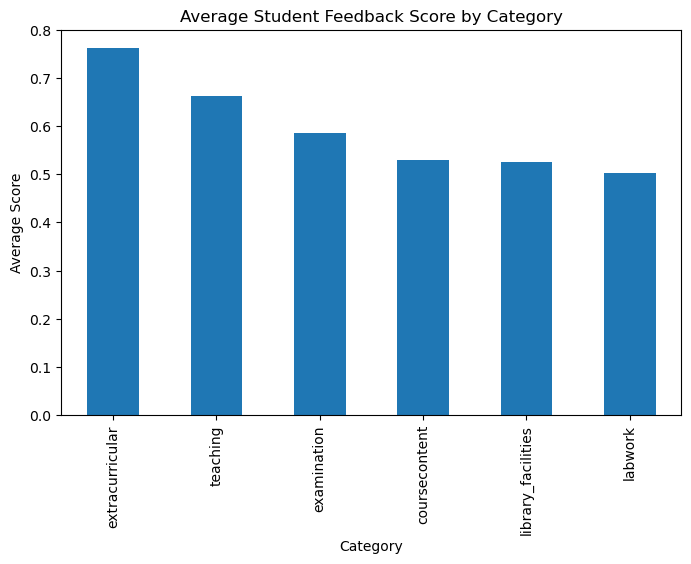

In [11]:
import matplotlib.pyplot as plt

avg_scores.plot(
    kind='bar',
    figsize=(8,5),
    title='Average Student Feedback Score by Category',
    ylabel='Average Score',
    xlabel='Category'
)
plt.show()


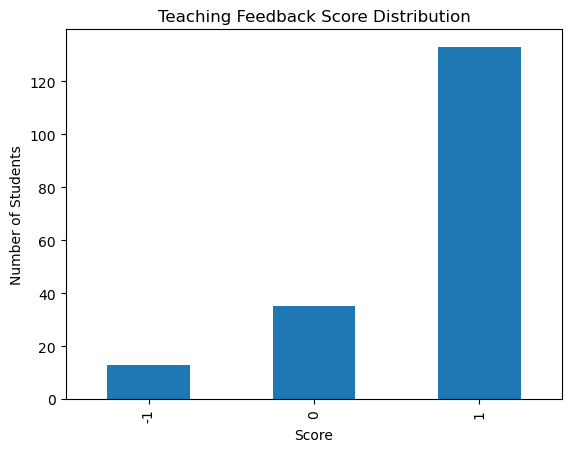

In [13]:
numeric_df['teaching'].value_counts().sort_index().plot(
    kind='bar',
    title='Teaching Feedback Score Distribution',
    xlabel='Score',
    ylabel='Number of Students'
)
plt.show()


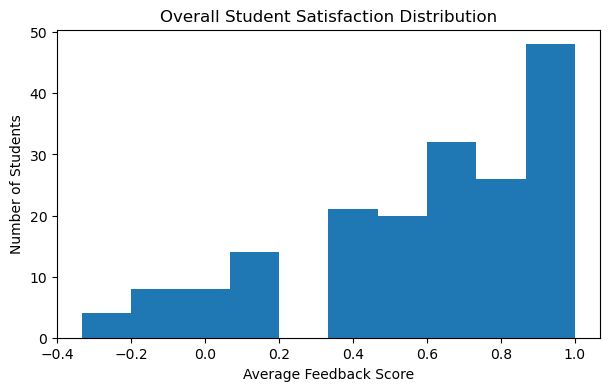

In [15]:
overall_satisfaction = numeric_df.mean(axis=1)

plt.figure(figsize=(7,4))
plt.hist(overall_satisfaction, bins=10)
plt.title('Overall Student Satisfaction Distribution')
plt.xlabel('Average Feedback Score')
plt.ylabel('Number of Students')
plt.show()


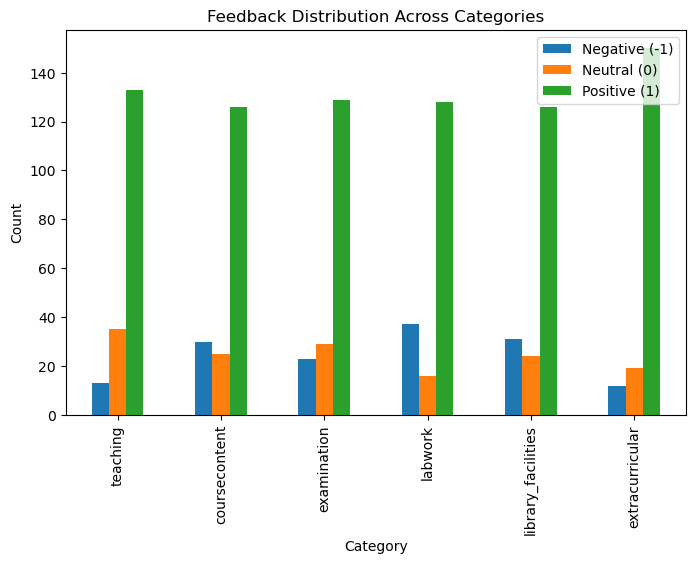

In [17]:
sentiment_counts = numeric_df.apply(pd.Series.value_counts).fillna(0)

sentiment_counts.T.plot(
    kind='bar',
    figsize=(8,5)
)
plt.title('Feedback Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
plt.show()


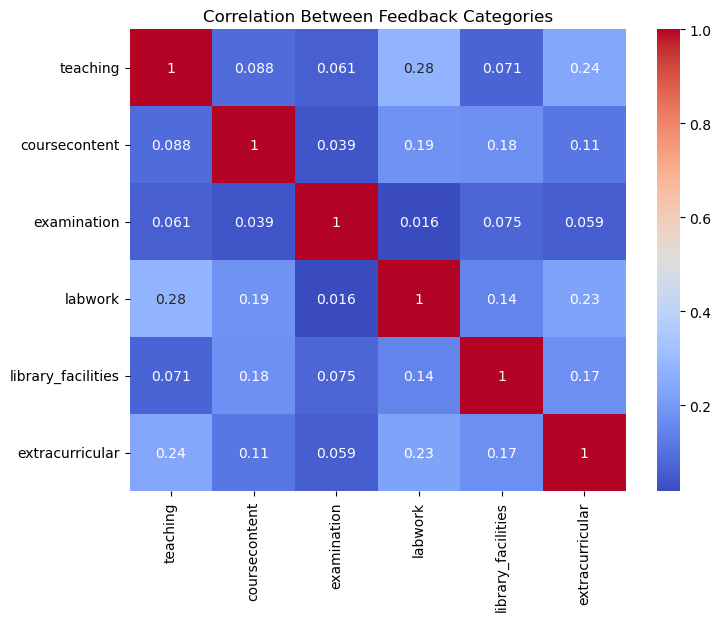

In [19]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Between Feedback Categories')
plt.show()


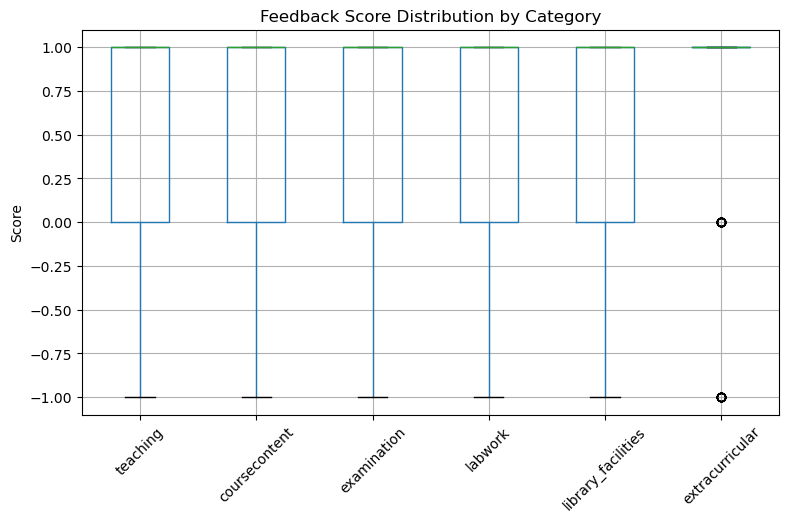

In [21]:
plt.figure(figsize=(9,5))
numeric_df.boxplot()
plt.title('Feedback Score Distribution by Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


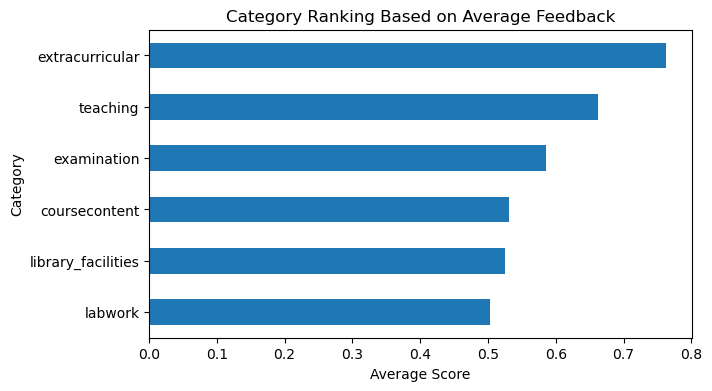

In [23]:
avg_scores.sort_values().plot(
    kind='barh',
    figsize=(7,4)
)
plt.title('Category Ranking Based on Average Feedback')
plt.xlabel('Average Score')
plt.ylabel('Category')
plt.show()
